<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/6_0817-iro-keras-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('winequality-red.csv')

In [4]:
data_q_sort = data['quality'].unique().sort()

In [5]:
test = data['quality'].unique()

In [6]:
# data.corr()

In [7]:
# import matplotlib.pyplot as plt
# import seaborn as sns

In [8]:
# plt.figure(figsize=(10,10))

In [9]:
# sns.heatmap(data.corr(), annot=True, linewidths=0.5)

In [10]:
# data.describe()

In [11]:
# len(data.columns)

In [12]:
# data.columns

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = data.iloc[:, 0:11]

In [18]:
y = data['quality'].values

In [19]:
y.shape

(1599,)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
y = le.fit_transform(y)

In [22]:
y

array([2, 2, 2, ..., 3, 2, 3])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [24]:
y_train_cat = to_categorical(y_train, 6)

In [25]:
y_test_cat = to_categorical(y_test, 6)

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))

In [28]:
s_X_train = scaler.fit_transform(X_train)

In [29]:
s_X_test = scaler.fit_transform(X_test)

In [ ]:
# type(s_X_train)

In [ ]:
# s_X_train.min()

In [ ]:
# df_s_X_train = pd.DataFrame(s_X_train)

In [ ]:
# df_s_X_train.describe()

In [30]:
# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=80, input_shape=[11], activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.5),
    layers.Dense(units=30, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.5),
    layers.Dense(units=10, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.5),
    layers.Dense(units=6, activation='softmax')
])

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(s_X_train, y_train_cat, validation_data = (s_X_test, y_test_cat), batch_size=64, epochs=150)

In [ ]:
# type(history)

In [ ]:
history.history

In [33]:
df_history = pd.DataFrame(history.history)

In [34]:
df_history.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [35]:
df_history['val_loss'].min()

0.9176369905471802

In [36]:
df_history['val_accuracy'].min()

0.42500001192092896

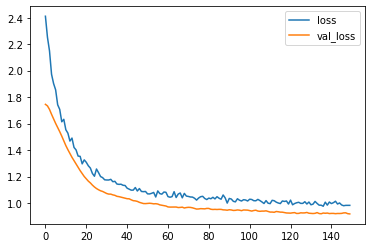

In [37]:
df_history.loc[0:150,['loss', 'val_loss']].plot()

In [38]:
s_X_test.shape

(320, 11)

In [39]:
y_pred = model.predict(s_X_test)

In [40]:
y_pred.shape

(320, 6)

In [49]:
y_pred[-2]

array([0.00331607, 0.00441195, 0.04055024, 0.4585038 , 0.4532213 ,
       0.03999661], dtype=float32)

In [45]:
y_pred[-1].max()

0.605693

In [50]:
y_test[-2]

3

In [54]:
import numpy as np

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
predictions = le.inverse_transform(np.argmax(model.predict(X_test), axis=-1))

In [57]:
CM = confusion_matrix(le.inverse_transform(y_test), predictions)


In [58]:
CM

array([[ 0,  0,  0,  0,  0,  1],
       [ 3,  0,  0,  0,  0,  7],
       [65,  0, 12,  0,  0, 53],
       [40,  0,  7,  0,  0, 85],
       [13,  0,  2,  0,  0, 27],
       [ 2,  0,  0,  0,  0,  3]])